In [5]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
holdings = pd.read_csv('raw_data/holdings.csv', usecols=[
    'year', 'quarter', 'cik', 'company_name', 'date_filed', 'date_holding',
    'nameOfIssuer', 'titleOfClass', 'cusip', 'value',
    'shrsOrPrnAmt_sshPrnamt', 'shrsOrPrnAmt_sshPrnamtType', 'putCall'])

C:\Users\ohste\AppData\Local\Temp\ipykernel_7600\3527546454.py:1: DtypeWarning: Columns (2,5,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  holdings = pd.read_csv('raw_data/holdings.csv', usecols=[


In [7]:
holdings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109980604 entries, 0 to 109980603
Data columns (total 13 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   year                        int64  
 1   quarter                     int64  
 2   cik                         object 
 3   company_name                object 
 4   date_filed                  object 
 5   date_holding                object 
 6   nameOfIssuer                object 
 7   titleOfClass                object 
 8   cusip                       object 
 9   value                       object 
 10  shrsOrPrnAmt_sshPrnamt      float64
 11  shrsOrPrnAmt_sshPrnamtType  object 
 12  putCall                     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 10.7+ GB


In [8]:
holdings.isna().sum()

year                                  0
quarter                               0
cik                                   0
company_name                          3
date_filed                            3
date_holding                    1449494
nameOfIssuer                       1291
titleOfClass                    3117947
cusip                               329
value                                73
shrsOrPrnAmt_sshPrnamt               75
shrsOrPrnAmt_sshPrnamtType     16430188
putCall                       104321966
dtype: int64

In [9]:
holdings[holdings.nameOfIssuer.isna()]

,year,quarter,cik,company_name,date_filed,date_holding,nameOfIssuer,titleOfClass,cusip,value,shrsOrPrnAmt_sshPrnamt,shrsOrPrnAmt_sshPrnamtType,putCall
1769696,2000,3,945628,WORLD ASSET MANAGEMENT LLC,2000-08-14,2000-06-30,NaN,ADR,707190401,3106.0,182200.0,NaN,NaN
12867615,2004,4,1109424,RITCHIE CAPITAL MANAGEMENT LLC,2004-11-02,2004-09-30,NaN,COM,202608105,195.0,12300.0,SH,NaN
12867616,2004,4,1109424,RITCHIE CAPITAL MANAGEMENT LLC,2004-11-02,2004-09-30,NaN,COM,703395103,345.0,4500.0,SH,NaN
12867617,2004,4,1109424,RITCHIE CAPITAL MANAGEMENT LLC,2004-11-02,2004-09-30,NaN,COM,726079106,275.0,13100.0,SH,NaN
12867618,2004,4,1109424,RITCHIE CAPITAL MANAGEMENT LLC,2004-11-02,2004-09-30,NaN,SPONSORED ADR,50047P104,2687.0,399903.0,SH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109525458,2022,2,1491126,"Chieftain Capital Management, Inc.",2022-05-16,2022-03-31,NaN,NaN,000000000,0,0.0,SH,NaN
109553542,2022,2,1544731,First Reserve GP XII Ltd,2022-05-16,2022-03-31,NaN,NaN,000000000,0,0.0,SH,NaN
109779500,2022,2,1770682,"MIC CAPITAL PARTNERS (PUBLIC) (US) IM, LLC",2022-05-16,2022-03-31,NaN,COM,000000000,0,0.0,SH,NaN
109849852,2022,2,1714524,Capital Bank & Trust Co,2022-05-16,2022-03-31,NaN,COM,000000000,0,0.0,SH,NaN


In [10]:
# Drop NA company_name, date_filed, date_holding, nameOfIssuer, cusip, value, shrsOrPrnAmt_sshPrnamt
holdings_without_na =  holdings.dropna(subset=[
    "company_name", "date_filed", "date_holding", "nameOfIssuer", "cusip", "value", "shrsOrPrnAmt_sshPrnamt"])

In [11]:
holdings_without_na.isna().sum()

year                                  0
quarter                               0
cik                                   0
company_name                          0
date_filed                            0
date_holding                          0
nameOfIssuer                          0
titleOfClass                    2996923
cusip                                 0
value                                 0
shrsOrPrnAmt_sshPrnamt                0
shrsOrPrnAmt_sshPrnamtType     15859010
putCall                       102880319
dtype: int64

In [12]:
# Number of rows dropped
print(f"Number of rows dropped: {len(holdings) - len(holdings_without_na)}")
print(f"Percentage of rows dropped: {round((len(holdings) - len(holdings_without_na)) / len(holdings) * 100,2)}%")

Number of rows dropped: 1451092
Percentage of rows dropped: 1.32%


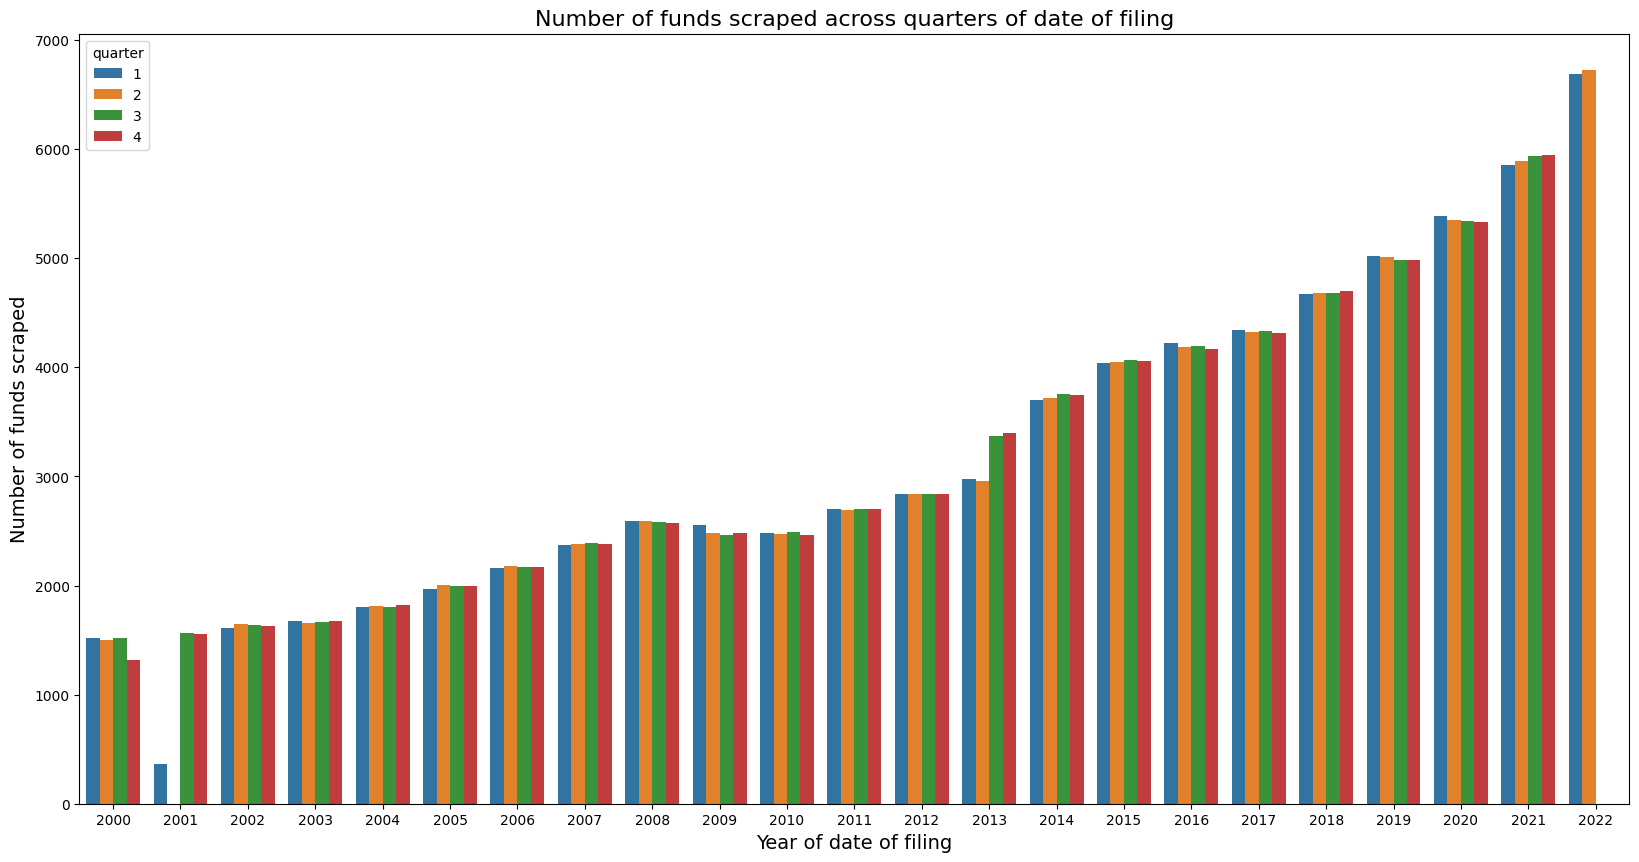

In [20]:
comp_count = holdings_without_na.groupby(["year","quarter"]).company_name.nunique().reset_index()
comp_count.rename(columns={"company_name":"company_count"}, inplace=True)
plt.figure(figsize=(20,10))
ax = sns.barplot(x="year", y="company_count", hue="quarter", data=comp_count)
plt.title("Number of funds scraped across quarters of date of filing",fontsize=16)
plt.ylabel("Number of funds scraped",fontsize=14)
plt.xlabel("Year of date of filing",fontsize=14)
plt.show()

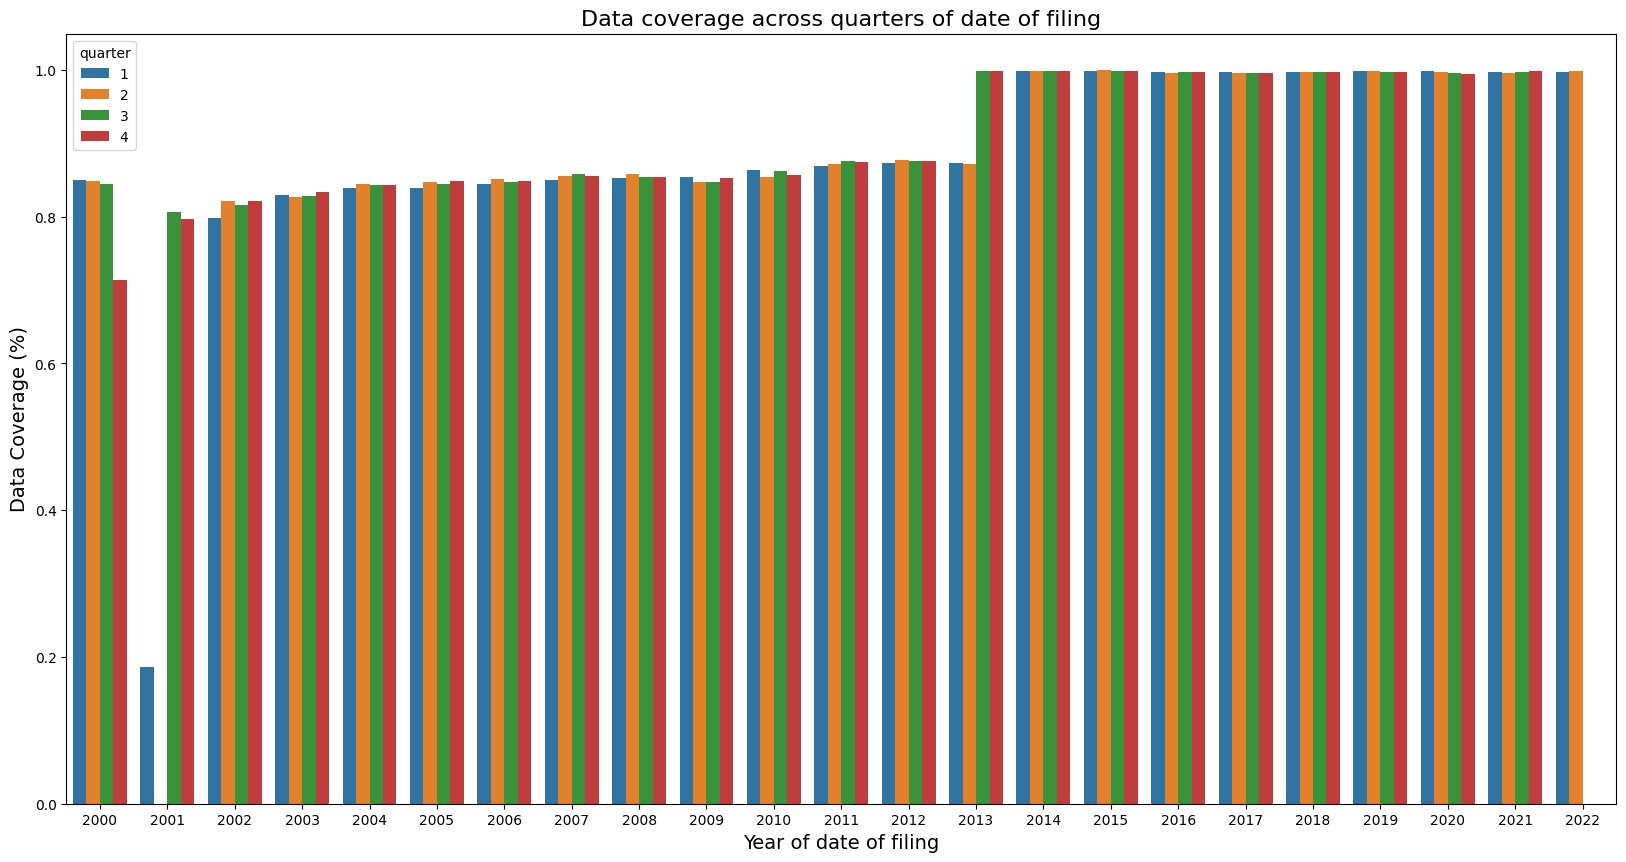

In [21]:
list_13f = pd.read_csv('raw_data/13f_list.csv')
full_comp_count = list_13f.groupby(["year","quarter"]).cik.count()
coverage = (comp_count.set_index(["year","quarter"]).company_count / full_comp_count).reset_index().rename(columns={0:"coverage_pct"})
plt.figure(figsize=(20,10))
ax = sns.barplot(x="year", y="coverage_pct", hue="quarter", data=coverage)
plt.title("Data coverage across quarters of date of filing",fontsize=16)
plt.ylabel("Data Coverage (%)",fontsize=14)
plt.xlabel("Year of date of filing",fontsize=14)
plt.show()

In [ ]:
holdings_without_na.to_csv('raw_data/holdings_without_na.csv', index=False)